In [1]:
import matplotlib 
from matplotlib import cm
#permette di aprire le immagini in cartelle a parte, separate dal notebook
#matplotlib.use('Qt5Agg')

from scipy import odr
from pylab import *
from scipy.optimize import curve_fit
import sep
from astropy.io import fits
import matplotlib.pyplot as plt 
import numpy as np
from astropy.stats import sigma_clipped_stats
from astropy.modeling import models, fitting
from astropy import table

from matplotlib.patches import Ellipse


In [4]:
fitsfile_mask = fits.open('/data1/astrolab/data/projects/3dhst/Images/cosmos_3dhst.v4.0.F140W_mask.fits')
fitsfile_sci = fits.open('/data1/astrolab/data/projects/3dhst/Images/cosmos_3dhst.v4.0.F140W_orig_sci.fits')
fitsfile_wht = fits.open('/data1/astrolab/data/projects/3dhst/Images/cosmos_3dhst.v4.0.F140W_orig_wht.fits')
#fitsfile_mask.info() #No stampa il numero delle extension.  0 ho una sola extension
#print('\n', fitsfile_mask[0].header) #mettendo il contenuto = 'qualcosa' rinomino la header
#print('\n', fitsfile_sci[0].header) #ci serve per calcolare il flusso
#print('\n', fitsfile_wht[0].header) #mettendo il contenuto = 'qualcosa' rinomino la header

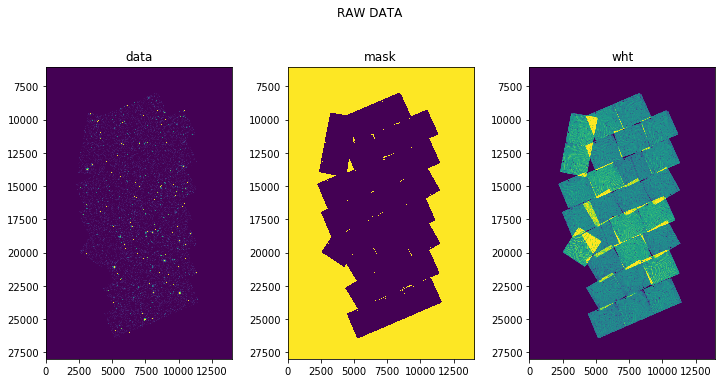

In [7]:
fig = plt.figure( figsize = (12,6))

plt.suptitle('RAW DATA')
plt.subplot(1,3,1)
plt.imshow(fitsfile_sci[0].data[:], clim = [0,0.4]) #dati
plt.ylim(28000,6000)
plt.title('data')

plt.subplot(1,3,2)
plt.imshow(fitsfile_mask[0].data[:], clim = [0,0.4]) #maschera
plt.ylim(28000,6000)
plt.title('mask')

plt.subplot(1,3,3)
plt.imshow(fitsfile_wht[0].data[:], clim = [0.01,2000]) #profondità
plt.ylim(28000,6000)
plt.title('wht')

plt.subplots_adjust(wspace = 0.3)

fig.savefig('raw_data.png')

sezioni di cielo

In [5]:
sci_1 = np.zeros([500,500])
sci_1[:,:] = fitsfile_sci[0].data[12150:12650,5450:5950]

sci_2 = np.zeros([500,500])
sci_2[:,:] = fitsfile_sci[0].data[15000:15500,5000:5500]

sci_3 = np.zeros([500,500])
sci_3[:,:] = fitsfile_sci[0].data[17500:18000,7500:8000]

sci_4 = np.zeros([500,500])
sci_4[:,:] = fitsfile_sci[0].data[20500:21000,8000:8500]

sci_5 = np.zeros([500,500])
sci_5[:,:] = fitsfile_sci[0].data[10500:11000,9400:9900]

#porzioni più grosse
sci_6 = np.zeros([5000,2000])
sci_6[:,:] = fitsfile_sci[0].data[12000:17000,5000:7000]

sci_7 = np.zeros([2000,5000])
sci_7[:,:] = fitsfile_sci[0].data[19000:21000,5500:10500]

sci = [sci_1, sci_2, sci_3, sci_4, sci_5, sci_6, sci_7]

wht_1 = np.zeros([500,500])
wht_1[:,:] = fitsfile_wht[0].data[12150:12650,5450:5950]

wht_2 = np.zeros([500,500])
wht_2[:,:] = fitsfile_wht[0].data[15000:15500,5000:5500]

wht_3 = np.zeros([500,500])
wht_3[:,:] = fitsfile_wht[0].data[17500:18000,7500:8000]

wht_4 = np.zeros([500,500])
wht_4[:,:] = fitsfile_wht[0].data[20500:21000,8000:8500]

wht_5 = np.zeros([500,500])
wht_5[:,:] = fitsfile_wht[0].data[10500:11000,9400:9900]

#porzioni più grosse
wht_6 = np.zeros([5000,2000])
wht_6[:,:] = fitsfile_wht[0].data[12000:17000,5000:7000]

wht_7 = np.zeros([2000,5000])
wht_7[:,:] = fitsfile_wht[0].data[19000:21000,5500:10500]

wht = [wht_1, wht_2, wht_3, wht_4, wht_5, wht_6, wht_7]

In [6]:
square_title = ['(5450,5950)x(12150,12650)', '(5000,5500)x(15000,15500)', '(7500,8000)x(17500,18000)', 
         '(8000,8500)x(20500,21000)', '(9400,9900)x(10500,11000)']

rectitle = ['(5000,7000)x(12000,17000)','(5500,10500)x(19000,21000)']

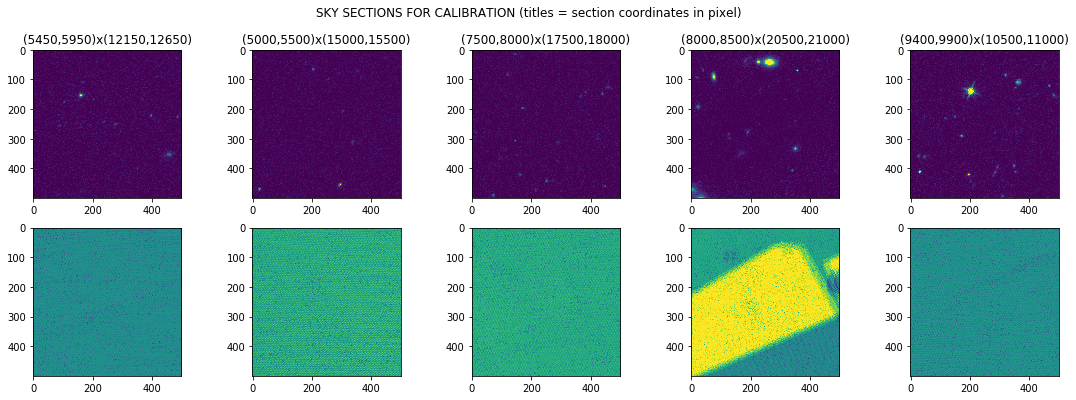

In [7]:
fig1 = plt.figure( figsize = (19,6) )

plt.suptitle('SKY SECTIONS FOR CALIBRATION (titles = section coordinates in pixel)')
for i in range(10):
    plt.subplot(2,5,i+1)
    if i<5:
        plt.title(square_title[i])
        plt.imshow(sci[i], clim = [0.,0.4])
        
    if i>=5:
        plt.imshow(wht[i-5], clim = [0.01, 2000])
        
fig1.savefig('sezioni_cal_sq.png')

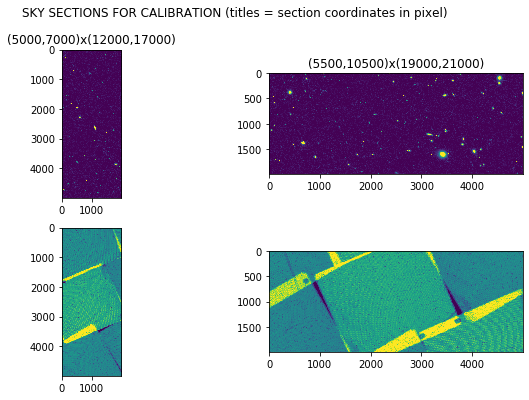

In [8]:
fig2 = plt.figure( figsize = (10,6) )

plt.suptitle('SKY SECTIONS FOR CALIBRATION (titles = section coordinates in pixel)')
for i in range(4):
    plt.subplot(2,2,i+1)
    if i<2:
        plt.title(rectitle[i])
        plt.imshow(sci[i+5], clim = [0.,0.4])
        
    if i>=2:
        plt.imshow(wht[i+3], clim = [0.01, 2000])
        
fig2.savefig('sezioni_cal_rect.png')

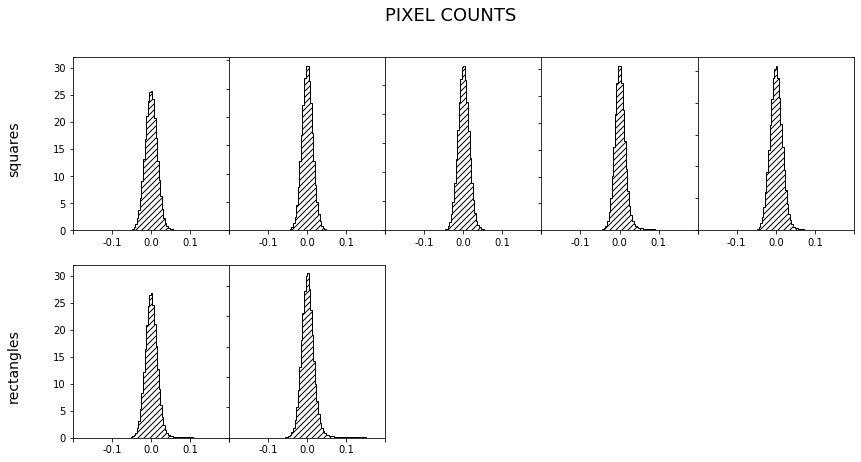

In [52]:
#esempio
fig3 = plt.figure(figsize = (14,7))
fig3.suptitle('PIXEL COUNTS', fontsize = 18 )
figtext(0.06, 0.65, 'squares', rotation = 'vertical', fontsize = 14)
figtext(0.06, 0.2, 'rectangles', rotation= 'vertical', fontsize = 14)
for i in range(7):
    ax = plt.subplot(2,5,i+1)
    plt.hist(sci[i].flatten(),bins = 100,density = True,range = (-0.2,0.2),
             histtype = 'step', color = 'black', hatch = '////')
    
    if i  == 0 or i == 5:
        #ax.set_yticklabels([0,10,20,30])
        plt.ylim(0,32)
        
    else:
        ax.set_yticklabels([])
        
    
    ax.set_xticklabels([ '',-0.1,0.0,0.1,'' ])
    ax.set_xlim(-0.2,0.2)

plt.subplots_adjust(wspace = 0)

plt.show()
fig3.savefig('conteggi_pixel.png')

In [34]:
skymean_1, skylevel_1,skyrms_1 = sigma_clipped_stats(sci_1, sigma=3, maxiters=30)
print (skyrms_1,skymean_1,skylevel_1)

skymean_2, skylevel_2,skyrms_2 = sigma_clipped_stats(sci_2, sigma=3, maxiters=30)
print (skyrms_2,skymean_2,skylevel_2)

skymean_3, skylevel_3,skyrms_3 = sigma_clipped_stats(sci_3, sigma=3, maxiters=30)
print (skyrms_3,skymean_3,skylevel_3)

skymean_4, skylevel_4,skyrms_4 = sigma_clipped_stats(sci_4, sigma=3, maxiters=30)
print (skyrms_4,skymean_4,skylevel_4)

skymean_5, skylevel_5,skyrms_5 = sigma_clipped_stats(sci_5, sigma=3, maxiters=30)
print (skyrms_5,skymean_5,skylevel_5)

skymean_6, skylevel_6,skyrms_6 = sigma_clipped_stats(sci_6, sigma=3, maxiters=30)
print ('\n',skyrms_6,skymean_6,skylevel_6)

skymean_7, skylevel_7,skyrms_7 = sigma_clipped_stats(sci_7, sigma=3, maxiters=30)
print (skyrms_7,skymean_7,skylevel_7)

0.015127848585654996 0.00012218618534354776 9.07947396626696e-05
0.013409387175194715 0.00023774370862119043 0.00013377482537180185
0.013791950946787026 0.00018315116842751187 0.00010424575884826481
0.01281243568949286 0.000754260897992009 0.0004985877312719822
0.015288103875179461 0.0004411127545392039 0.0002960803685709834

 0.014812117698738362 0.0005804197698945932 0.00039217050652951
0.014739328118517461 0.0008226803596311325 0.0005599544965662062


In [68]:
#calcolo media degli rms per quadratini
rms_tot = [skyrms_1, skyrms_2, skyrms_3, skyrms_4, skyrms_5]
rms_tot_mean = np.mean(rms_tot) 
#probabilmente dato lo scarso numero di campioni abbiamo sottostimato l'errore

#calcolo errore sulla media (deviazione standard)
rms_tot_dev = np.std(rms_tot) #per confrontare con quello dei rettangoli più grossi

print(rms_tot_mean, rms_tot_dev)

0.014085945254461812 0.0009691994635317729


In [69]:
#calcolo media degli rms per rettangoli
rms_tot_r = [skyrms_6, skyrms_7]
rms_tot_mean_r = np.mean(rms_tot_r) 

#calcolo errore sulla media (deviazione standard)
rms_tot_dev_r = np.std(rms_tot_r) 

print(rms_tot_mean_r, rms_tot_dev_r)

0.01477572290862791 3.639479011045051e-05


bella, sono consistenti :D

NOTA_ l'inverso del quadrato dell'RMS dovrebbe essere il valore di picco degli istogrammi di var_1 var_2 e var_3 (che sono l'inverso della varianza), cioè la loro moda. Si può fare un confronto con l'rms medio che abbiamo calcolato sopra.

In [70]:
var_1 = np.zeros([500,500])
var_1[:,:] = fitsfile_wht[0].data[12150:12650,5450:5950]

var_2 = np.zeros([500,500])
var_2[:,:] = fitsfile_wht[0].data[15000:15500,5000:5500]

var_3 = np.zeros([500,500])
var_3[:,:] = fitsfile_wht[0].data[17500:18000,7500:8000]


<IPython.core.display.Javascript object>


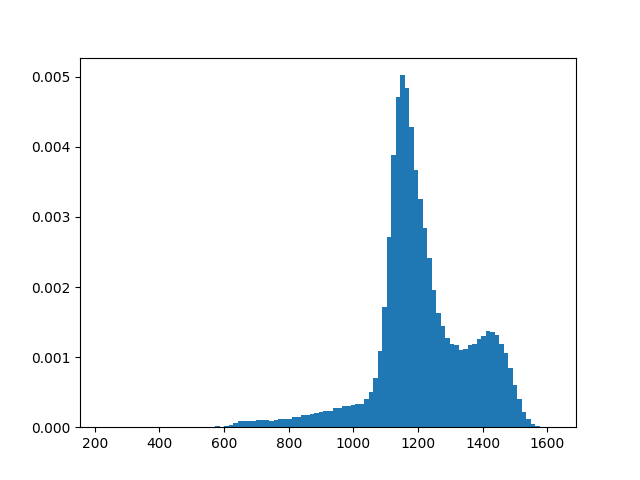

In [71]:
%matplotlib notebook
plt.hist(var_2.flatten(),bins = 100,density = True)
plt.show()

proviamo a capire come selezionare le sorgenti utilizzando sextr.

In [72]:
np.shape(fitsfile_sci[0].data[:])

(36000, 14000)

In [73]:
new_sci = np.zeros([19500, 10000])
new_mask = np.zeros([19500, 10000])

new_sci[:,:] = fitsfile_sci[0].data[7500:27000, 2000:12000]
new_mask[:,:] = fitsfile_mask[0].data[7500:27000, 2000:12000]
#new_sci[:,:] = fitsfile_sci[0].data
#new_mask[:,:] = fitsfile_mask[0].data


abbiamo tagliato i dati perchè se no non funziona l'sextractor, quando salveremo i dati nella tabella li facciamo rishiftare il tutto alla posizione originale.

In [74]:
oggetti = sep.extract(new_sci, 5, err=rms_tot_mean, minarea = 100, mask = new_mask) 
#minarea = dimensione in pixel, 5 = threshold ; per vedere come funziona

<IPython.core.display.Javascript object>


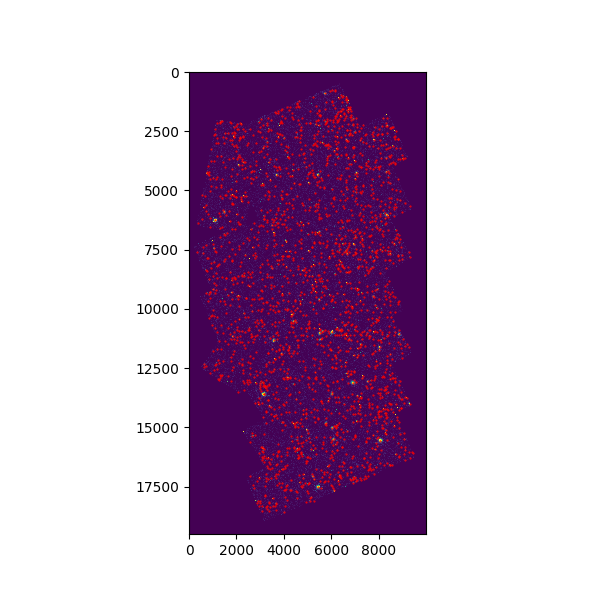

In [75]:
%matplotlib notebook
#print (oggetti['x'],oggetti['y'])
plt.figure(figsize=(6,6))
plt.plot(oggetti['x'],oggetti['y'],'.', c='r',markersize = 1.)
plt.imshow(new_sci, clim = [0.,0.4])

plt.show()

senza il parametro mask nel sextractor, la funzione considerava come sorgenti dei pixel appartenenti alla maschera che per qualche motivo avevano valori esageratamente superiori a quelli delle sorgenti che ci interessano.

Sopra abbiamo preso i dati e li abbiamo buttati di cattiveria nel sepextractor. Di seguito quantifichiamo prima il background e lo togliamo ai dati di sci.

In [76]:
bkg=sep.Background(new_sci, mask = new_mask) 
print(bkg.globalrms)
print (bkg.globalback)

0.01581667736172676
-2.9042477763141505e-05


ci sta che esca questo valore, 10-20% distante da quello che avevamo calcolato con i quadratini. 
Inoltre, sottraendo il background non mi aspetto cambi di molto dato che è bassissimo, più basso anche dell'rms (rientra tutto dentro all'rms quindi)

<IPython.core.display.Javascript object>


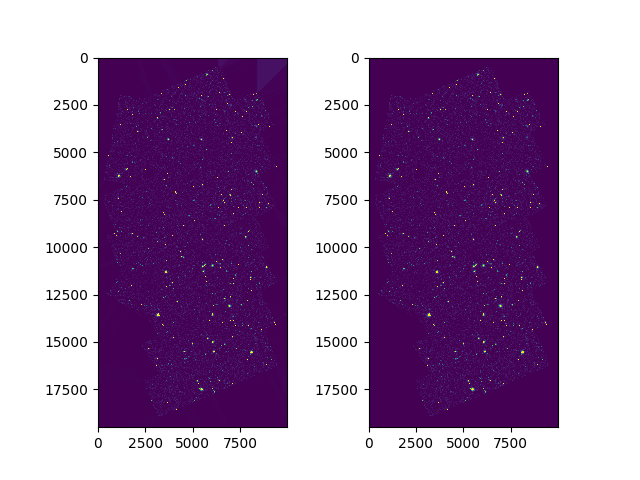

In [77]:
%matplotlib notebook
vns = new_sci - bkg
#print (vns)
plt.subplot(1,2,1)
plt.imshow(vns, clim = (0.,0.4))

plt.subplot(1,2,2)
plt.imshow(new_sci, clim = (0.,0.4))

In [79]:
oggetti_vn = sep.extract(vns, 1.8, err = bkg.globalrms, minarea = 14, mask = new_mask) 
oggetti_vvn = sep.extract(vns, 2., err = bkg.globalrms, minarea = 14, mask = new_mask) 
print (len(oggetti_vn))
print (len(oggetti_vvn))


13711
12278


<IPython.core.display.Javascript object>


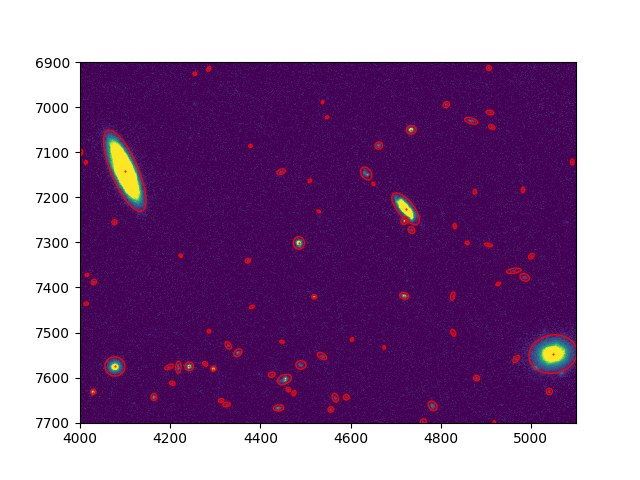

In [82]:
# plot background-subtracted image
fig, ax = plt.subplots()
m, s = np.mean(vns), np.std(vns)

ax.plot(oggetti_vn['x'],oggetti_vn['y'],'.', c='r',markersize = 1.)
ax.imshow(vns, clim = [0.,0.4])


# plot an ellipse for each object
for i in range(len(oggetti_vn)):
    e = Ellipse(xy=(oggetti_vn['x'][i], oggetti_vn['y'][i]),
                width=6*oggetti_vn['a'][i],
                height=6*oggetti_vn['b'][i],
                angle=oggetti_vn['theta'][i] * 180. / np.pi)
    e.set_facecolor('none')
    e.set_edgecolor('red')
    ax.add_artist(e)
plt.xlim(4000,5100)
plt.ylim(7700,6900)
plt.show()
plt.savefig('gal_selez_section.png')

facciamo la stessa analisi con i dati son la sigma a 2. al posto che 1.8

<IPython.core.display.Javascript object>


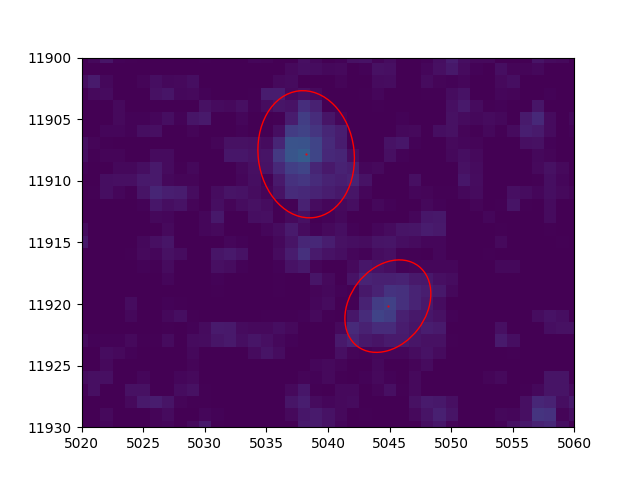

In [84]:
%matplotlib notebook


# plot background-subtracted image
fig, ax = plt.subplots()
m, s = np.mean(vns), np.std(vns)

ax.plot(oggetti_vvn['x'],oggetti_vvn['y'],'.', c='r',markersize = 1.)
ax.imshow(vns, clim = [0.,0.4])

# plot an ellipse for each object
for i in range(len(oggetti_vvn)):
    e = Ellipse(xy=(oggetti_vvn['x'][i], oggetti_vvn['y'][i]),
                width=6*oggetti_vvn['a'][i],
                height=6*oggetti_vvn['b'][i],
                angle=oggetti_vvn['theta'][i] * 180. / np.pi)
    e.set_facecolor('none')
    e.set_edgecolor('red')
    ax.add_artist(e)
    
plt.xlim(5020,5060)
plt.ylim(11930,11900)
plt.show()
plt.savefig('2sigma_trashold.png')

l'esextractor con una sigma più alta evidenzia oggetti che hanno una parvenza maggiore di segnale. Con 1.8 era troppo facile confondere pixel della sorgente con quelli del fondo

adesso ci interessa capire quale colonna del mio 'oggetti_vvn' contiene i conteggi/sec. Moltiplicando i conteggi per il fattore di conversione trovato all'inizio otteniamo il flusso. Avendo il flusso possiamo calcolare la magnitudine delle sorgenti.

In [29]:
print ('x=',oggetti_vn['x'],'\n\ny=',oggetti_vn['y'],'\n\noggetti=',oggetti_vn[0]) 
#come sono collegate queste coordinate ad RA e dec?? vd risposta sul quaderno

x= [6381.65125419 6411.82505278 6232.38664045 ... 3153.2289292  3340.03466016
 3302.0559803 ] 

y= [  489.08564558   524.45667649   545.16034368 ... 18895.80635881
 18919.05382668 18926.64682102] 

oggetti= (0.02847002, 19, 18, 6380, 6383, 484, 492, 6381.65125419, 489.08564558, 0.89736407, 6.11291827, 0.19688132, 0.00902478, 0.06210868, 0.00276058, 2.47393203, 0.94336766, 1.53311896, 1.12230539, 0.16475217, -0.07229313, 0.71472788, 0.92334241, 0.0570655, 0.08427688, 6382, 491, 6382, 491, 0)


In [85]:
##Tagliando l'immagine, abbiamo compromesso le coordinate dei pixel. Quindi le ritrasliamo del
#valore del taglio (+2000,+7500)

oggetti_vn_sigma2 = oggetti_vvn

oggetti_vn_sigma2['x'] = oggetti_vvn['x'] + 2000
oggetti_vn_sigma2['y'] = oggetti_vvn['y'] + 7500

In [86]:
##Calcolo il flusso

#immagine 'convoluta': smussata e prende il flusso (diminuisce l rumore)
cflusso = oggetti_vn_sigma2['cflux'] * fitsfile_sci[0].header['PHOTFNU'] 
#prendo questa perchè più consistente con immagine iniziale
flusso = oggetti_vn_sigma2['flux'] * fitsfile_sci[0].header['PHOTFNU']


print ('cflux =', cflusso)
print ('\nflux =', flusso)

print ('\nmin=',np.min(flusso))
print ('max=',np.max(flusso))

print ('\ncmin=',np.min(cflusso))
print ('cmax=',np.max(cflusso))


cflux = [5.68020490e-08 1.39711136e-07 5.70758946e-08 ... 7.03832777e-08
 1.13250531e-07 7.28606165e-08]

flux = [7.44646131e-08 1.58186734e-07 7.16500138e-08 ... 8.71633381e-08
 1.39112838e-07 8.27791730e-08]

min= 2.9927406732682465e-08
max= 0.023449995896336118

cmin= 2.5267450777564074e-08
cmax= 0.023446840866413226


In [87]:
###Calcoliamo l'errore sul flusso
texp = fitsfile_sci[0].header['EXPTIME']

err_src = np.sqrt(oggetti_vn_sigma2['flux']*texp)
err_sky = np.sqrt( oggetti_vn_sigma2['npix']*texp**2 * bkg.globalrms**2)
err_flusso = np.sqrt(err_src**2 + err_sky**2)/texp * fitsfile_sci[0].header['PHOTFNU']

err_relativo = err_flusso/ flusso 
print (np.mean(err_relativo))

0.05583932251977493


In [88]:
#Calcoliamo errore sulla magnitudine

magn_ap = -2.5*np.log10(flusso)+8.9

err_magn = 1.086 * err_flusso/flusso 

print ('errore relativo = ', np.mean(err_magn/magn_ap))
print('min magn_ap=',np.min(magn_ap), 'err min = ', np.min(err_magn))
print('max magn_ap=',np.max(magn_ap), 'err max = ', np.max(err_magn))

errore relativo =  0.002368468721792237
min magn_ap= 12.97464307237211 err min =  0.00016388844989093565
max magn_ap= 27.70982728495266 err max =  0.2116434216576181


In [89]:
###costruiamo la tabella con la threshold 2 sigma (senza errore)
tabella_ogg_sigma2 = table.Table(oggetti_vn_sigma2)
tabella_ogg_sigma2.add_column(table.Column(magn_ap), name = 'mag')
tabella_ogg_sigma2.add_column(table.Column(np.arange(len(oggetti_vvn))+1, name = 'ID'))
print (tabella_ogg_sigma2)


       thresh       npix tnpix xmin xmax ... ypeak flag        mag           ID 
------------------- ---- ----- ---- ---- ... ----- ---- ------------------ -----
0.03163335472345352   15    15 6380 6383 ...   491    0 26.720125156430797     1
0.03163335472345352   19     9 6409 6414 ...   524    0 25.902074849669226     2
0.03163335472345352   14    13 6231 6234 ...   545    1  26.76195930421197     3
0.03163335472345352    9     8 6147 6151 ...   581    1  27.41548704188928     4
0.03163335472345352   16    14 6474 6478 ...   649    1 26.747305416441762     5
0.03163335472345352   76    68 6379 6394 ...   657    0 24.842339269963244     6
0.03163335472345352  151   144 6203 6224 ...   669    0   23.9854059183683     7
0.03163335472345352   68    60 6423 6432 ...   689    0  24.77421201427164     8
0.03163335472345352   14    11 5873 5880 ...   705    0  27.01337879592623     9
0.03163335472345352  133   125 6437 6453 ...   710    1  24.03130577117764    10
                ...  ...   .

In [105]:
tabella_ogg_sigma2

thresh,npix,tnpix,xmin,xmax,ymin,ymax,x,y,x2,y2,xy,errx2,erry2,errxy,a,b,theta,cxx,cyy,cxy,cflux,flux,cpeak,peak,xcpeak,ycpeak,xpeak,ypeak,flag,mag,ID
float64,int64,int64,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,int64,int64,float64,int64
0.03163335472345352,15,15,6380,6383,485,492,8381.68570870451,7989.610628126587,0.8212338209013521,4.249689980172896,-0.3634071702324224,0.00939124881063093,0.049470853164942895,-0.004181981429206672,2.070697069168091,0.8849502801895142,-1.4663454294204712,1.2655705213546753,0.2445659041404724,0.21644750237464905,0.5960895419120789,0.7814432382583618,0.05706550180912018,0.08427688479423523,6382,491,6382,491,0,26.720125156430797,1
0.03163335472345352,19,9,6409,6414,522,526,8411.88238323038,8024.445650505559,1.5273698420883406,1.000429736361684,0.4521038306224865,0.005164999147014611,0.0030374347931729885,0.0016202416037381137,1.336851716041565,0.8605968952178955,0.5215731859207153,0.7558237314224243,1.1539264917373657,-0.6831280589103699,1.4661504030227661,1.6600362062454224,0.19958630204200745,0.29861488938331604,6412,525,6412,524,0,25.902074849669226,2
0.03163335472345352,14,13,6231,6234,543,548,8232.386640446814,8045.160343678237,0.6586364187359779,2.6424843087943124,0.7108566285872007,0.007066149275782133,0.02867026472065299,0.007474090004530075,1.6943732500076294,0.6559116840362549,1.2598916292190552,2.1394567489624023,0.5332573652267456,-1.151073694229126,0.5989633202552795,0.7519063949584961,0.057832542806863785,0.07004809379577637,6232,544,6233,545,1,26.76195930421197,3
0.03163335472345352,9,8,6147,6151,581,582,8149.161589038282,8081.36271442432,2.084597843033107,0.24819387906399953,0.06058912407306061,0.04209841567301773,0.0050805744172679095,0.001154034399914016,1.444504976272583,0.4961824417114258,0.03294559195637703,0.4831368625164032,4.057900428771973,-0.23588688671588898,0.33523476123809814,0.41186290979385376,0.03995127230882645,0.06864263862371445,6150,581,6151,581,1,27.41548704188928,4
0.03163335472345352,16,14,6474,6478,646,650,8475.88440529468,8148.3629306165485,1.4997642716508457,1.6489546050785648,0.7350270233111145,0.015404767876887288,0.01657129658224997,0.00745771187793985,1.520908236503601,0.9140880107879639,0.8359681963920593,0.8531523942947388,0.7759628295898438,-0.7605910897254944,0.6408461928367615,0.7621234655380249,0.050488319247961044,0.06654659658670425,6477,649,6478,649,1,26.747305416441762,5
0.03163335472345352,76,68,6379,6394,650,660,8385.586200693342,8155.978314723877,7.795375293811986,4.835648968737431,-0.05033931007672976,0.0111754761414398,0.006493332565179497,-0.00013001725950315357,2.792173147201538,2.1988162994384766,-0.017001541331410408,0.1282898187637329,0.20681138336658478,0.0026710047386586666,4.153888702392578,4.405668258666992,0.12345743924379349,0.15020208060741425,6385,657,6385,657,0,24.842339269963244,6
0.03163335472345352,151,144,6203,6224,662,674,8214.099390199244,8167.8255804801365,19.20659694655849,6.951248219089074,-6.045203703710129,0.010807723120074256,0.0037458675598645522,-0.003349076242234642,4.6568922996521,2.1145212650299072,-0.38931167125701904,0.0716879740357399,0.19807693362236023,0.12468793243169785,9.378512382507324,9.700299263000488,0.12489345669746399,0.13549812138080597,6214,668,6214,669,0,23.9854059183683,7
0.03163335472345352,68,60,6423,6432,684,693,8427.387427493386,8188.893715475719,3.9435075955452668,4.6514329913206005,0.2247021782193528,0.004553041584471323,0.00517205248690142,0.00015219849356835332,2.1718039512634277,1.9693167209625244,1.2879818677902222,0.25428128242492676,0.21558092534542084,-0.024567723274230957,4.4780378341674805,4.690970420837402,0.14785778522491455,0.17572718858718872,6427,689,6427,689,0,24.77421201427164,8
0.03163335472345352,14,11,5873,5880,702,706,7877.049628914773,8204.005303309681,3.9895470005310827,1.677024130959225,-1.215491694110181,0.056681342

esporto su tabella fits

In [106]:
hduout_s2 = fits.BinTableHDU(tabella_ogg_sigma2)
hduout_s2.writeto('output_table_sigma2.fits')

confrontando questa tabella sul topcat viene un alto numero di corrispondenze (confronto direttamente le colonne x e y della nostra matrice con quelle del catalogo.)

avendo calcolato gli errori sulla mgnitudine aggiungiamo alla tabella una colonna relativa agli errori e rifacciamo il match.

In [90]:
###costruiamo la tabella aggiungendo gli errori
tabella_ogg2_err = table.Table(oggetti_vn_sigma2)
tabella_ogg2_err.add_column(table.Column(magn_ap), name = 'mag')
tabella_ogg2_err.add_column(table.Column(err_magn), name = 'err_mag')
tabella_ogg2_err.add_column(table.Column(np.arange(len(oggetti_vvn))+1, name = 'ID'))
print (tabella_ogg2_err)

       thresh       npix tnpix ...        mag               err_mag          ID 
------------------- ---- ----- ... ------------------ -------------------- -----
0.03163335472345352   15    15 ... 26.720125156430797  0.12502885294542423     1
0.03163335472345352   19     9 ... 25.902074849669226   0.0773388167022836     2
0.03163335472345352   14    13 ...  26.76195930421197  0.12657132848851668     3
0.03163335472345352    9     8 ...  27.41548704188928  0.17765911953989605     4
0.03163335472345352   16    14 ... 26.747305416441762    0.129324558493517     5
0.03163335472345352   76    68 ... 24.842339269963244  0.05140507385890528     6
0.03163335472345352  151   144 ...   23.9854059183683  0.03389599487693686     7
0.03163335472345352   68    60 ...  24.77421201427164 0.048046999698824935     8
0.03163335472345352   14    11 ...  27.01337879592623  0.15031505223409405     9
0.03163335472345352  133   125 ...  24.03130577117764  0.03403614953666527    10
                ...  ...   .

In [ ]:
#la salvo su file da mettere sul topcat
hduout_s2_err = fits.BinTableHDU(tabella_ogg2_err)
hduout_s2_err.writeto('tabella_ogg2_err.fits')

In [53]:
###ABBIAMO MATCHATO, ora confrontiamo le magnitudine nostre (con gli errori) con quelle del catalogo.
#path = '/data1/astlab04'
match_sigma2 = fits.open('file:///data1/astlab04/match_ogg2_err')

mag_catalogo = match_sigma2[1].data['m_f140w']
mag_err_catalogo = match_sigma2[1].data['e_f140w']
mag_vvn_match = match_sigma2[1].data['mag']
mag_err_vvn_match = match_sigma2[1].data['err_mag']

<IPython.core.display.Javascript object>


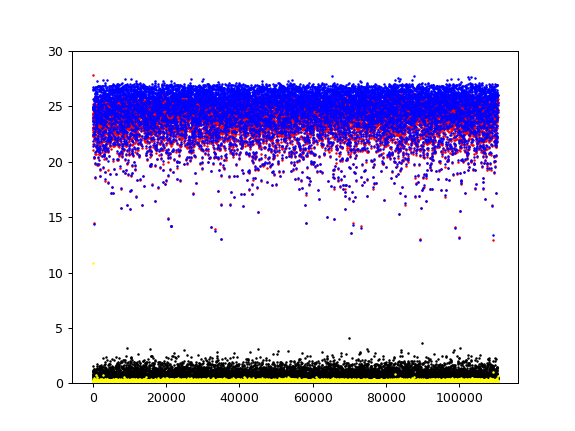

In [54]:

x = np.arange(0,110420, 10)

%matplotlib notebook
plt.ylim(0,30)
plt.scatter(x,mag_catalogo, c = 'r', s=1)
plt.scatter(x,mag_vvn_match, c = 'blue', s = 1)

plt.scatter(x,abs(mag_catalogo-mag_vvn_match), c = 'black', s = 1)
plt.scatter(x,mag_err_vvn_match + mag_err_catalogo, c = 'yellow', s = 1)


#plt.plot(x,mag_catalogo, c = 'r', ls = 'dashed')
#plt.errorbar(x, mag_vvn_match, yerr = mag_err_vvn_match, c = 'blue', ls = 'dashed' )
plt.show()



In [54]:
###Fittiamo i dati con una retta

def lineare(p,x):
    m, q = p
    y = m*x + q
    return y

quad_model = odr.Model(lineare)
data = odr.RealData(mag_catalogo,mag_vvn_match, sx = mag_err_catalogo, sy = mag_err_vvn_match)
odr = odr.ODR(data, quad_model, beta0 = [1.,0.])
out = odr.run()
print (out.beta)

[ 1.00918686 -0.13112106]


<IPython.core.display.Javascript object>


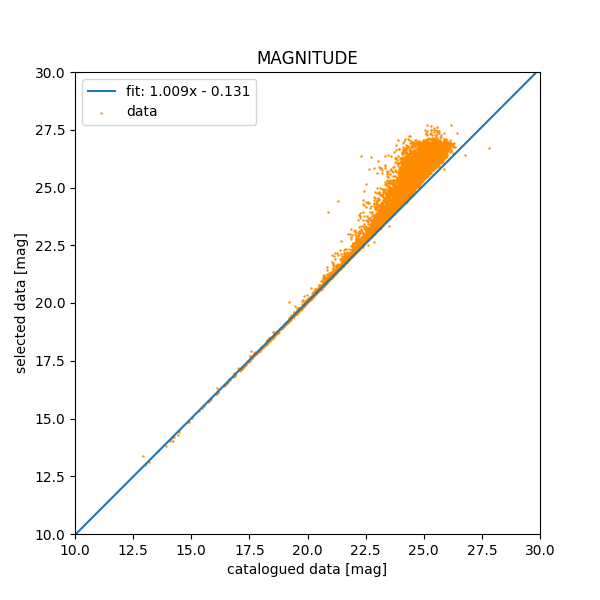

In [67]:
#plottiamo ciò che otteniamo
#####Plottiamo le magnitudini del catalogo in x e nostre in y: dovremmo ottenere una relazione lineare.
#Deve essere più o meno la bisettrice: ad alte magnitudini (sorgenti poco luminose/molto distanti)
#è più facile sballare perchè dipende molto dall'apertura: 
#più o meno grande prendo più o meno fotoni che sballano facilmente una sorgente debole piuttosto che una forte.


%matplotlib notebook
plt.figure(figsize=(6,6))

plt.xlim(0,30)
x = np.linspace(10,30,100)
plt.scatter(mag_catalogo,mag_vvn_match, s = 0.5, label = 'data', c = 'darkorange')
plt.plot(x, out.beta[0]*x + out.beta[1], 
         label = 'fit: '+str(round(out.beta[0], 3))+r'x - '+str(round(np.abs(out.beta[1]), 3)) )
#plt.plot(x,x, ls = '--', c = 'r', label = 'bisector')
plt.xlim(10,30)
plt.ylim(10,30)
plt.title('MAGNITUDE')
plt.xlabel('catalogued data [mag]')
plt.ylabel('selected data [mag]')
plt.legend()

plt.show()
plt.savefig('data_vs_catalogue.png')

In [115]:
#questi sono i valori ottenuti dal fit
print ('m=', out.beta[0])
print ('q=', out.beta[1])

m= 1.0091868606610064
q= -0.13112106097612977


<IPython.core.display.Javascript object>


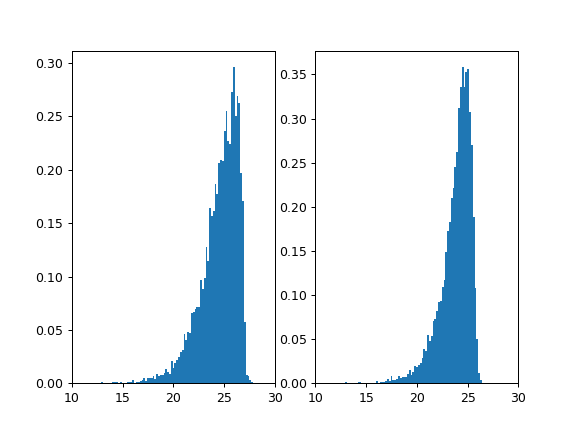

In [135]:
###Confrontiamo ulteriormente le magnitudini facendo l'istogramma
%matplotlib notebook
plt.subplot(1,2,1)

plt.hist(mag_vvn_match, bins = 100, range = [12,30], density = True)
plt.xlim(10,30)
plt.subplot(1,2,2)
plt.hist(mag_catalogo, bins = 100, range = [12,30], density = True)

plt.xlim(10,30)

plt.show()




<IPython.core.display.Javascript object>


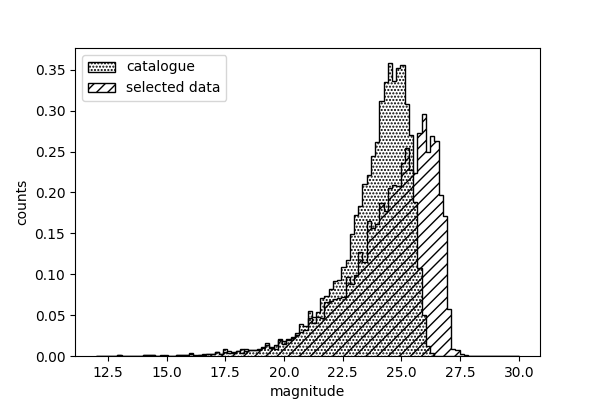

In [139]:
#confronto sullo stesso plot
fig4 = plt.figure( figsize=(6,4))
plt.hist(mag_catalogo, bins=100, range=[12,30], density = True, color = 'black',
         label = 'catalogue',  histtype = 'step', hatch = '.....')
plt.hist(mag_vvn_match, bins = 100, range=[12,30], density = True, color = 'black',
        label = 'selected data',  histtype = 'step', hatch = '///')
plt.xlabel('magnitude')
plt.ylabel('counts')
plt.legend(loc = 'upper left')
plt.show()
fig4.savefig('data_vs_catalogue_hist.png')

<IPython.core.display.Javascript object>


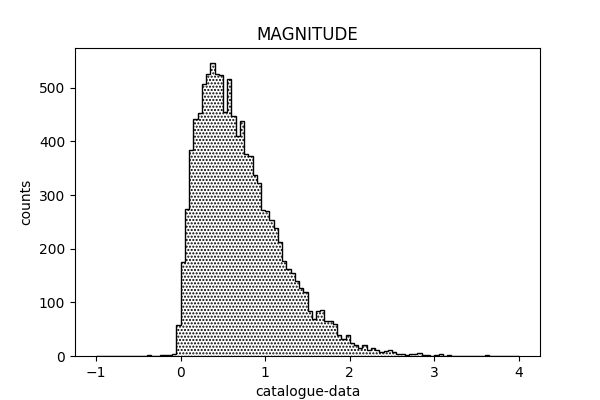

0.009056330374932078


In [150]:
##con il dato della magnitudine a -99, ci siamo chiesti se fosse possibile aver matchato cose a caso. 
#per questo motivo controlliamo la differenza tra i valori nostri e del catalogo
fig5 = plt.figure( figsize = (6,4))
plt.title('MAGNITUDE')
plt.hist(mag_vvn_match-mag_catalogo,bins=100,range=[-1,4],  histtype = 'step', color = 'black', hatch = '.....')
plt.xlabel('catalogue-data')
plt.ylabel('counts')
#controlliamo quante sorgenti hanno una differenza di magnitudine maggiore di 2 in percentuale per 
#verificare che sono veramente poche 

diff=mag_vvn_match-mag_catalogo
print(len([np.abs(diff) > 2])/len(diff)*100)

fig5.savefig('catalogue-data.png')